In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.duplicated().sum()

0

## Observations about the dataset

* There are 342 records
* There are 3 categorical and 4 numeric columns
* There are 18 missing and 0 duplicate values
* There appears to be no outliers in the data
* The dataset requires a bit of cleaning

## Cleaning the dataset

### Dropping the `NaN` rows

In [8]:
df.dropna(inplace=True)
df.reset_index().drop(columns='index', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


### Cleaning the `sex` column

In [10]:
df['sex'] = df['sex'].replace('.', 'FEMALE') # replacing all instances of '.' with 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

## Looking at some distributions

<Axes: xlabel='species', ylabel='count'>

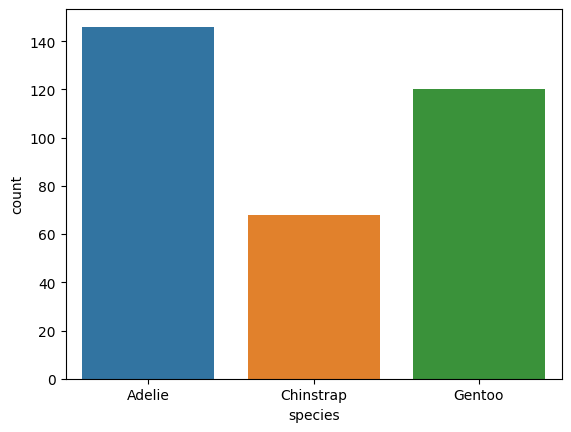

In [11]:
sns.countplot(df, x='species')

<Axes: xlabel='sex', ylabel='count'>

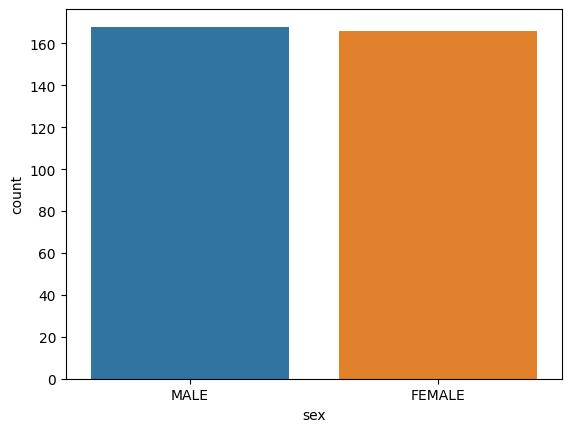

In [12]:
sns.countplot(df, x='sex')

<Axes: xlabel='island', ylabel='count'>

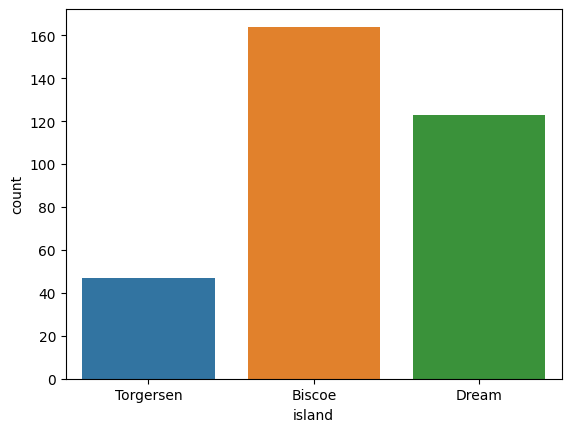

In [13]:
sns.countplot(df, x='island')

<Axes: xlabel='culmen_length_mm', ylabel='Count'>

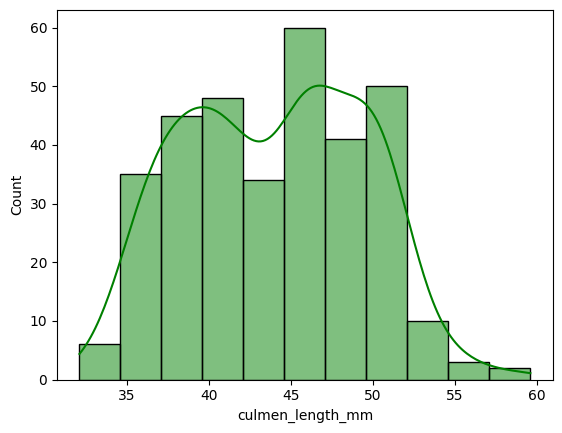

In [14]:
sns.histplot(df['culmen_length_mm'], kde=True, color='green')

<Axes: xlabel='culmen_depth_mm', ylabel='Count'>

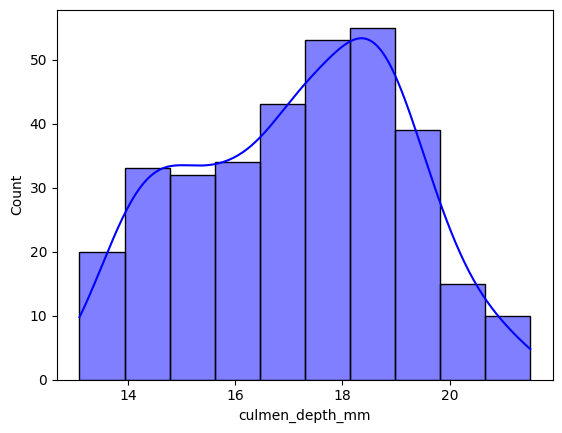

In [15]:
sns.histplot(df['culmen_depth_mm'], kde=True, color='blue')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

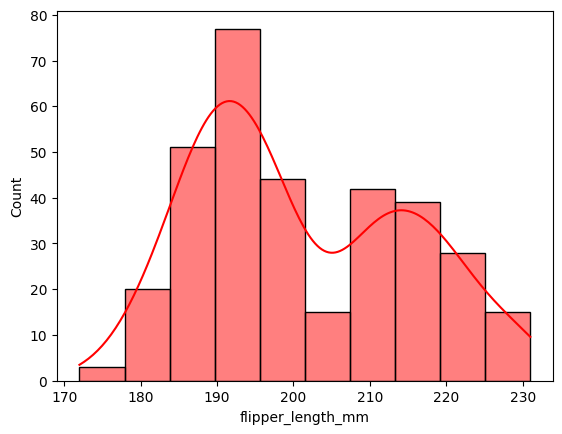

In [16]:
sns.histplot(df['flipper_length_mm'], kde=True, color='red')

<Axes: xlabel='body_mass_g', ylabel='Count'>

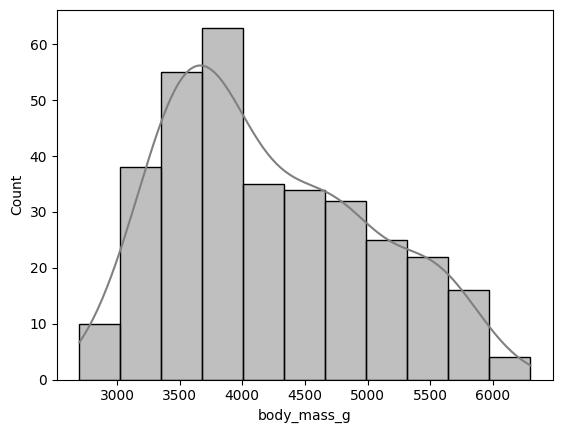

In [17]:
sns.histplot(df['body_mass_g'], kde=True, color='grey')

## A bit of EDA 

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

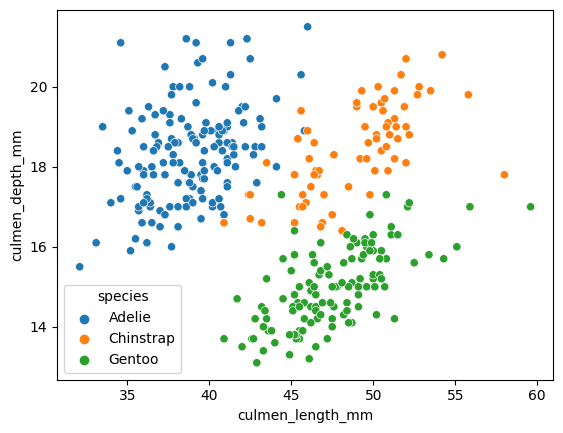

In [18]:
sns.scatterplot(df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

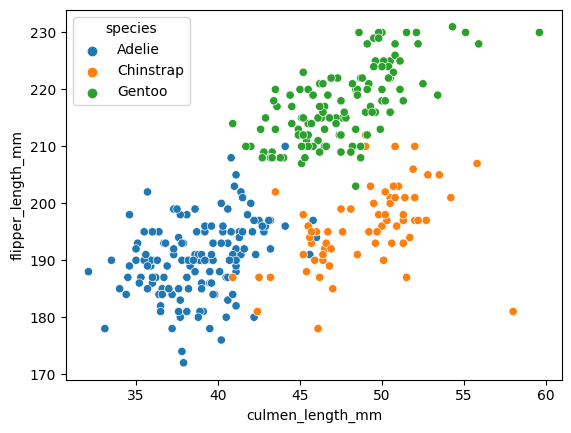

In [19]:
sns.scatterplot(df, x='culmen_length_mm', y='flipper_length_mm', hue='species')

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

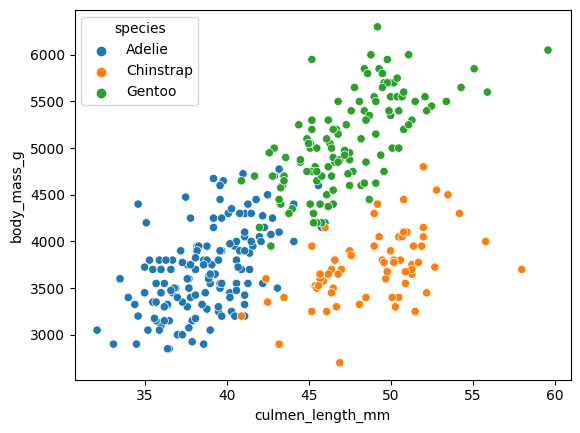

In [20]:
sns.scatterplot(df, x='culmen_length_mm', y='body_mass_g', hue='species')

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

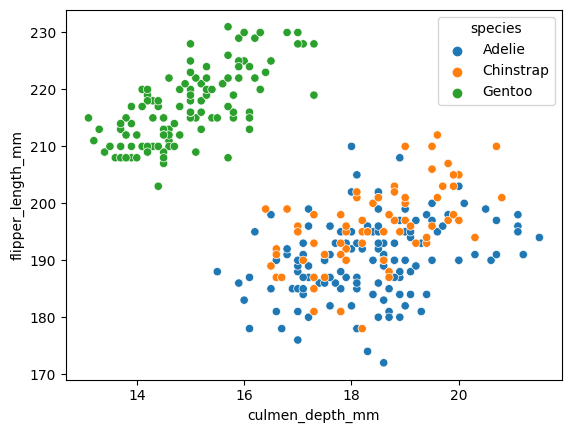

In [21]:
sns.scatterplot(df, x='culmen_depth_mm', y='flipper_length_mm', hue='species')

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

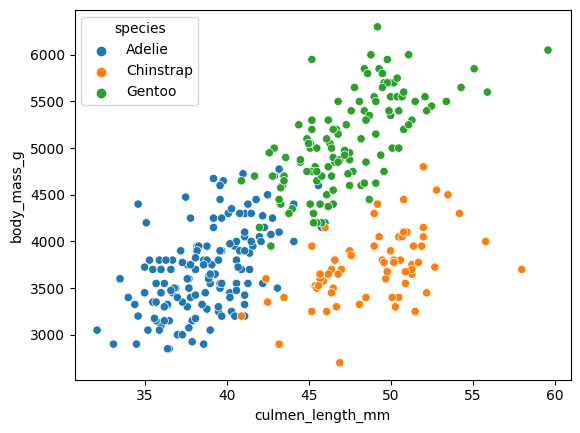

In [22]:
sns.scatterplot(df, x='culmen_length_mm', y='body_mass_g', hue='species')

<Axes: xlabel='body_mass_g', ylabel='species'>

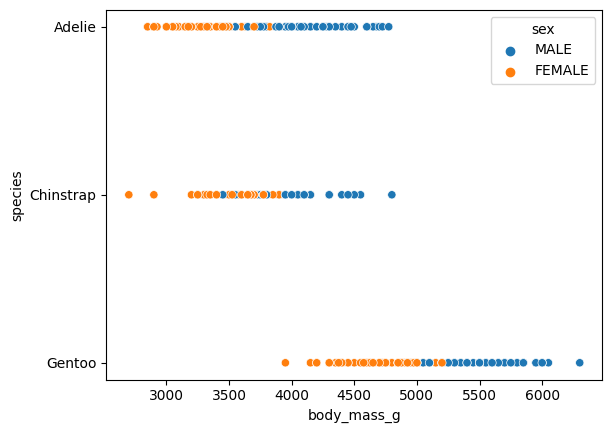

In [23]:
sns.scatterplot(df, x='body_mass_g', y='species', hue='sex')

### Feature Encoding

In [24]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('species')
print(categorical_cols)

reference_df = df['species']

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['island', 'sex']
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [25]:
df2 = df.copy()

#### Manual Encoding

In [26]:
df2['island'] = df2['island'].map({'Biscoe':0, 'Dream':1, 'Torgersen':2})
df2['species'] = df2['species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
df2['sex'] = df2['sex'].map({'MALE':0, 'FEMALE':1})

In [27]:
df2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,1,0,47.2,13.7,214.0,4925.0,1
340,1,0,46.8,14.3,215.0,4850.0,1
341,1,0,50.4,15.7,222.0,5750.0,0
342,1,0,45.2,14.8,212.0,5200.0,1


In [28]:
corr = round(df2.corr(),2)

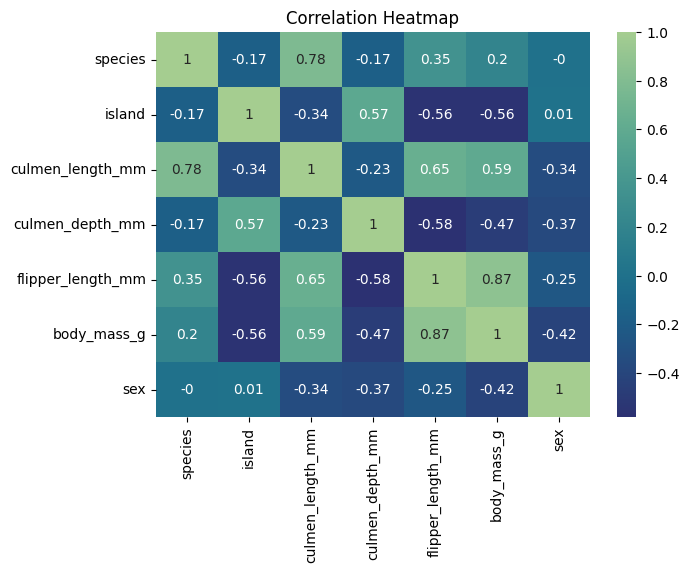

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='crest_r')
plt.title('Correlation Heatmap')
plt.show()

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=scaler.get_feature_names_out(df2.columns))
df2_scaled

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.001100,1.892604,-0.897653,0.783487,-1.429521,-0.571229,-0.994030
1,-1.001100,1.892604,-0.824290,0.121896,-1.072408,-0.509011,1.006006
2,-1.001100,1.892604,-0.677564,0.427246,-0.429605,-1.193405,1.006006
3,-1.001100,1.892604,-1.337831,1.088836,-0.572450,-0.944535,1.006006
4,-1.001100,1.892604,-0.860972,1.750427,-0.786718,-0.695664,-0.994030
...,...,...,...,...,...,...,...
329,0.305023,-0.910632,0.587947,-1.761093,0.927425,0.890886,1.006006
330,0.305023,-0.910632,0.514584,-1.455743,0.998847,0.797560,1.006006
331,0.305023,-0.910632,1.174851,-0.743261,1.498806,1.917477,-0.994030
332,0.305023,-0.910632,0.221132,-1.201285,0.784580,1.233083,1.006006


## Clustering

In [31]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.26, min_samples=5)
model.fit(df2_scaled[['culmen_length_mm', 'flipper_length_mm']])

DBSCAN(eps=0.26)

In [32]:
labels = model.labels_
df2_scaled['labels'] = labels
df2_scaled['labels'].value_counts()

labels
 0    159
 1    115
-1     30
 2     30
Name: count, dtype: int64

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

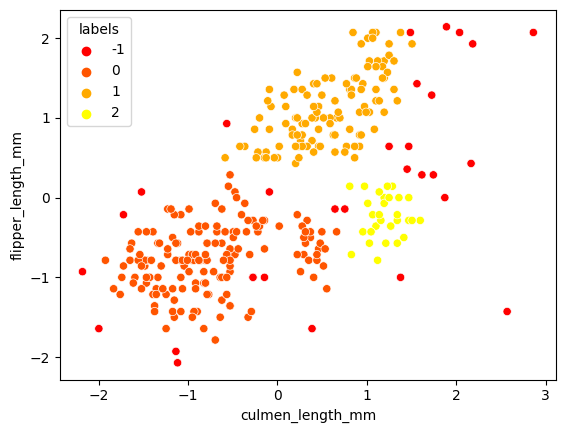

In [33]:
sns.scatterplot(df2_scaled, x='culmen_length_mm', y='flipper_length_mm', hue='labels', palette='autumn')

In [34]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(df2_scaled[['culmen_length_mm', 'flipper_length_mm']], df2_scaled['labels'])
round(ss,6)

0.41957

#### Finding the Optimal Silhouette Score?

In [35]:
score = []
for i in range(1, 21):
    model = DBSCAN(eps=(0.25 + (i/100)), min_samples=4)
    model.fit(df2_scaled[['culmen_length_mm', 'flipper_length_mm']])
    score.append(silhouette_score(df2_scaled[['culmen_length_mm', 'flipper_length_mm']], df2_scaled['labels']))
    print(0.25 + (i/100))
    print(score)

0.26
[0.4195695640736737]
0.27
[0.4195695640736737, 0.4195695640736737]
0.28
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.29
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.3
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.31
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.32
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.33
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.33999999999999997
[0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737, 0.4195695640736737]
0.35
[0.4195695640736737, 0.4195

### Observations

* It can be observed that DBSCAN clustered most of the records in 4 clusters (including -1 as the 'noisy' cluster)
* The Silhouette Score is 0.4196 (range: -1 to 1)
* The Score does not appear to increase with the increase in `eps` attribute.